In [1]:
# project: p6
# submitter: osundairo
# partner: none
# hours: 29
#https://www.w3schools.com/python/numpy/numpy_array_iterating.asp
import rasterio
from rasterio.mask import mask
from shapely.geometry import Polygon, box, Point
import geopandas as gpd
import pandas as pd
import re
import numpy as np
from zipfile import ZipFile
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [2]:
#q1
df = gpd.read_file("counties.geojson")
int(len(df))

72

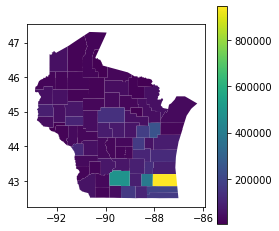

In [3]:
#q2
df
ax = df.plot(column="POP100", cmap="viridis", legend=True,figsize=(4,4))

In [4]:
conn = sqlite3.connect('counties_tracts.db')
tables=pd.read_sql("""SELECT * FROM sqlite_master""", conn)
area=pd.read_sql("""SELECT AREALAND FROM counties""", conn)
df["AREALAND"]=area
train, test= train_test_split(df,test_size=0.25, random_state=320)

In [5]:
#q3
list(test["NAME"])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [34]:
#q4
model = LinearRegression()
model.fit(train[["AREALAND"]],train["POP100"])
model.score(test[["AREALAND"]],test["POP100"])

LinearRegression()


In [38]:
#q5
smiles=500
smi_to_skm=2.59
skmiles=smiles*smi_to_skm
skm_to_sme=1000000
smeter=skmiles*skm_to_sme
milesdf=pd.DataFrame()
milesdf["AREALAND"]=[smeter]
model.predict(milesdf)[0]

82032.53073541154

In [8]:
conn1 =sqlite3.connect ('counties_tracts.db')

final=pd.read_sql("""SELECT a.*, SUM(HU100) HU100
                     FROM counties a
                     INNER JOIN tracts b 
                     ON a.COUNTY = b.COUNTY
                     GROUP BY a.COUNTY
                 """,conn1)
final=final.sort_values(by=["index"])
train1, test1= train_test_split(final,test_size=0.25, random_state=320)

In [9]:
#q6
list(test1["NAME"])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [10]:
#q7
hudict={}
x=0
for i in list(train1["NAME"]):
    hudict[i]=list(train1["HU100"])[x]
    x+=1
hudict

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [11]:
#q8
hulist=list(train1["HU100"])
train["HU100"]= hulist

scores= cross_val_score(model,train[["HU100"]],train["POP100"])
total=0
amount=0
for i in scores:
    total=total+i
    amount+=1
total/amount

0.9652534544116037

In [12]:
#q9
scores.std()

0.03704265206670459

In [13]:
#q10
model.fit(train[["HU100"]],train["POP100"])
coef= round(float(model.coef_), 2)
inte=round(float(model.intercept_), 2)
formula="POP100 = " +str(coef) + "*HU100 + "+ str(inte)
formula

'POP100 = 2.39*HU100 + -7910.46'

In [14]:
df=df.set_index(["NAME"])
final=final.set_index(["NAME"])

/home/patron/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x
Feature names seen at fit time, yet now missing:
- HU100

  warnings.warn(message, FutureWarning)


Text(216022, 488073, 'Dane')

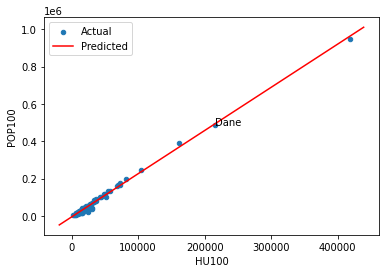

In [15]:
#q11

df["HU100"]=final["HU100"]
x=df["HU100"]
y=df["POP100"]
f=df.loc[["Dane County"],["POP100","HU100"]]
h=f.loc["Dane County"]["HU100"]
p=f.loc["Dane County"]["POP100"]
fig, ax = plt.subplots()
df.plot(kind="scatter",x='HU100', y='POP100',ax=ax)

train, test= train_test_split(df,test_size=0.25, random_state=320)
model=model.fit(df[["HU100"]],df["POP100"])

x = pd.DataFrame({"x": np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 0.1)})
y = model.predict(x)
ax.plot(x, y, c="red")
ax.legend(["Actual", "Predicted"])
plt.text(h, p,"Dane")

In [16]:
#q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
total=0
for i in np.nditer(A):
    if i >= 2 and i <= 5:
        total+=1
total

12

In [17]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

In [18]:
mw=df.loc["Milwaukee County","geometry"]
land = rasterio.open("zip://land.zip!wi.tif")
mw=gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[mw])

matrix, _ = mask(land, mw.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

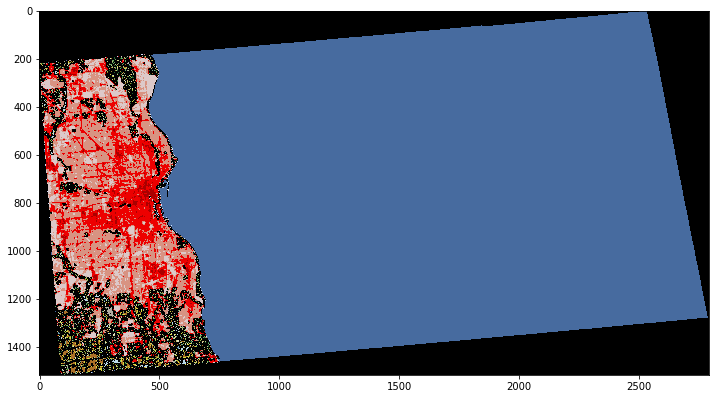

In [19]:
#q13
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)

In [20]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [21]:
#q14
owtotal=0
alltotal=0
for i in np.nditer(matrix):
    if i != 0:
        alltotal+=1
        if i == land_use["open_water"]:
            owtotal+=1
owtotal/alltotal

0.7963037455950543

In [22]:
count = np.count_nonzero(matrix == 11)
count


2725860

In [23]:
dictt={}
land = rasterio.open("zip://land.zip!wi.tif")
for index, rows in df.iterrows():
    totalp=0
    geometry=df.loc[index,"geometry"]
    geometry=gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[geometry])
    matrix, _ = mask(land, geometry.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    dictt[index]=np.count_nonzero(matrix == land_use["mixed_forest"])

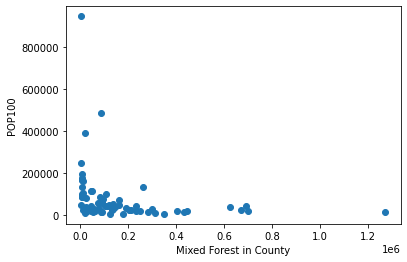

In [24]:
#q15
lists = dictt.items()
counties, open_water = zip(*lists)
pop=list(df["POP100"])
open_water=list(open_water)
plt.scatter(open_water, pop, label=True)
plt.xlabel("Mixed Forest in County")
plt.ylabel("POP100")
plt.show()

In [28]:
#q16
df1 = gpd.read_file("tracts.geojson")
type(df1)

geopandas.geodataframe.GeoDataFrame

In [32]:
land.read()

array([[[21, 90, 90, ...,  0,  0,  0],
        [22, 43, 90, ...,  0,  0,  0],
        [22, 52, 52, ...,  0,  0,  0],
        ...,
        [82, 82, 82, ..., 82, 82, 82],
        [82, 82, 82, ..., 82, 82, 82],
        [82, 82, 82, ..., 82, 82, 82]]], dtype=uint8)

In [26]:
#land.read()
#use feature to take
#columns add to df
#look at geoid and match geo id
#create two models
#use features chosen to predict pop100 column linear and logistic regression
#compare cross scores
#what is a better model
